In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Data\Bases Modificadas\df_sem_outliers.csv')

In [3]:
df.dtypes

Sexo                                              float64
Apoio_Familiar                                    float64
Apoio_de_Amigos                                   float64
Curso_Mais_Elevado                                float64
Diagnostico_Depressao                             float64
Estado_de_Saude                                   float64
Pratica_Exercicio                                 float64
Procura_Atendimento_Saude                         float64
Problemas_Sono                                    float64
peso_consolidado(KG)                              float64
altura_consolidada(CM)                            float64
IMC                                               float64
renda_total                                       float64
idade                                             float64
trabalhou                                         float64
doencas_cronicas                                    int64
moradia_vulneravel                                  int64
freq_bebida_al

In [4]:
df =df.astype('category')
df.dtypes

Sexo                                              category
Apoio_Familiar                                    category
Apoio_de_Amigos                                   category
Curso_Mais_Elevado                                category
Diagnostico_Depressao                             category
Estado_de_Saude                                   category
Pratica_Exercicio                                 category
Procura_Atendimento_Saude                         category
Problemas_Sono                                    category
peso_consolidado(KG)                              category
altura_consolidada(CM)                            category
IMC                                               category
renda_total                                       category
idade                                             category
trabalhou                                         category
doencas_cronicas                                  category
moradia_vulneravel                                catego

In [5]:
# Convertendo as colunas numéricas para float
df['peso_consolidado(KG)'] = df['peso_consolidado(KG)'].astype(float)
df['altura_consolidada(CM)'] = df['altura_consolidada(CM)'].astype(float)
df['renda_total'] = df['renda_total'].astype(float)
df['idade'] = df['idade'].astype(int)

In [6]:
df = df.drop('idade', axis= 1)

In [7]:
df.columns

Index(['Sexo', 'Apoio_Familiar', 'Apoio_de_Amigos', 'Curso_Mais_Elevado',
       'Diagnostico_Depressao', 'Estado_de_Saude', 'Pratica_Exercicio',
       'Procura_Atendimento_Saude', 'Problemas_Sono', 'peso_consolidado(KG)',
       'altura_consolidada(CM)', 'IMC', 'renda_total', 'trabalhou',
       'doencas_cronicas', 'moradia_vulneravel', 'freq_bebida_alcoolica',
       'Consumo de Graos e Tuberculos', 'Consumo de Leguminosas',
       'Consumo de Carnes', 'Consumo de Ovos', 'Consumo de Verduras e Legumes',
       'Consumo de Frutas', 'Consumo de Laticinios', 'Consumo de Oleaginosas',
       'Consumo de Refrigerantes', 'Consumo de Sucos Industrializados',
       'Consumo de Sucos Naturais', 'Consumo de Bebidas Lacteas',
       'Consumo de Salgadinhos e Biscoitos Salgados',
       'Consumo de Doces e Sobremesas Industrializadas',
       'Consumo de Embutidos e Alimentos Processados',
       'Consumo de Paes Industrializados',
       'Consumo de Molhos Industrializados', 'Consumo de Sal']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53438 entries, 0 to 53437
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Sexo                                            53438 non-null  category
 1   Apoio_Familiar                                  53438 non-null  category
 2   Apoio_de_Amigos                                 53438 non-null  category
 3   Curso_Mais_Elevado                              53438 non-null  category
 4   Diagnostico_Depressao                           53438 non-null  category
 5   Estado_de_Saude                                 53438 non-null  category
 6   Pratica_Exercicio                               53438 non-null  category
 7   Procura_Atendimento_Saude                       53438 non-null  category
 8   Problemas_Sono                                  53438 non-null  category
 9   peso_consolidado(KG)        

In [9]:
df['Diagnostico_Depressao'].value_counts()

Diagnostico_Depressao
2.0    48598
1.0     4840
Name: count, dtype: int64

In [10]:
df.isna().sum()

Sexo                                              0
Apoio_Familiar                                    0
Apoio_de_Amigos                                   0
Curso_Mais_Elevado                                0
Diagnostico_Depressao                             0
Estado_de_Saude                                   0
Pratica_Exercicio                                 0
Procura_Atendimento_Saude                         0
Problemas_Sono                                    0
peso_consolidado(KG)                              0
altura_consolidada(CM)                            0
IMC                                               0
renda_total                                       0
trabalhou                                         0
doencas_cronicas                                  0
moradia_vulneravel                                0
freq_bebida_alcoolica                             0
Consumo de Graos e Tuberculos                     0
Consumo de Leguminosas                            0
Consumo de C

### Balanceado os dados

In [11]:
# 1. Importar as bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# 2. Separar as features (X) e o target (y)
X = df.drop('Diagnostico_Depressao', axis=1)
y = df['Diagnostico_Depressao']

# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Criar um objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# 5. Aplicar o undersampling ao conjunto de treino
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


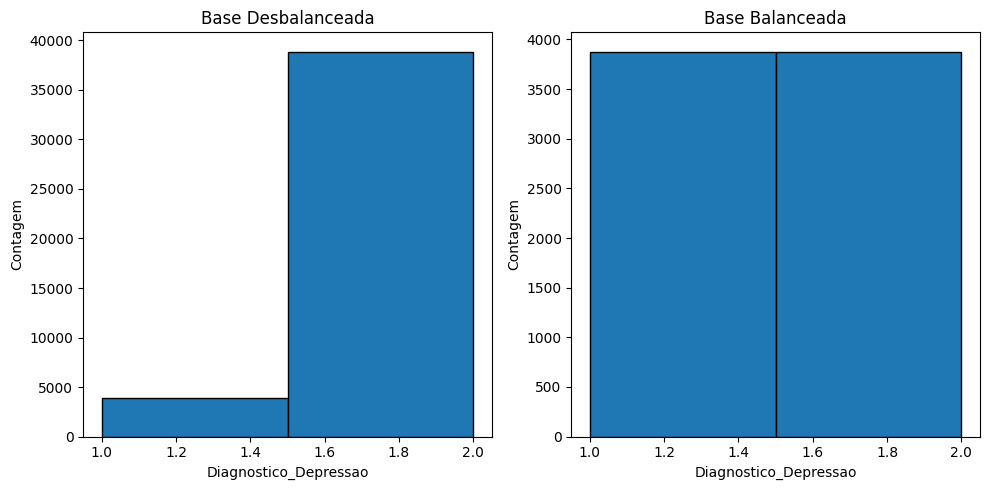

In [12]:
plt.figure(figsize=(10, 5))

# Histograma da base desbalanceada
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=2, edgecolor='black')
plt.title('Base Desbalanceada')
plt.xlabel('Diagnostico_Depressao')
plt.ylabel('Contagem')

# Histograma da base balanceada
plt.subplot(1, 2, 2)
plt.hist(y_train_resampled, bins=2, edgecolor='black')
plt.title('Base Balanceada')
plt.xlabel('Diagnostico_Depressao')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [13]:
# Salvar os dados de treino
X_train_resampled.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Python\Notebooks\Modelling\X_train_resampled.csv', index=False)
y_train_resampled.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Python\Notebooks\Modelling\y_train_resampled.csv', index=False)

# Salvar os dados de teste
X_test.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Python\Notebooks\Modelling\X_test.csv', index=False)
y_test.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Python\Notebooks\Modelling\y_test.csv', index=False)